In [56]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd

In [57]:
df = pd.read_csv('gaia_100_parsecs_dist.csv') #data of all stars within 100 parsecs of the Sun sorted by parallax (descending order)

<ipython-input-59-a628ac099f65>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


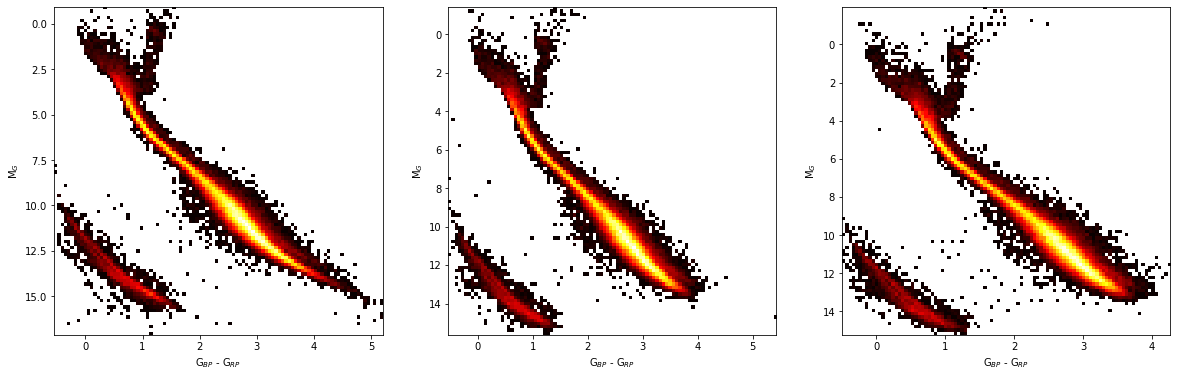

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 20))
color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

#HR diagram for the nearest third
histogram, xedges, yedges = np.histogram2d(
    df['bp_rp'][:75862], df['g_abs'][:75862], bins=100)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

im1 = ax1.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2]))

ax1.invert_yaxis()
ax1.set_xlabel('G$_{BP}$ - G$_{RP}$')
ax1.set_ylabel('M$_G$')

#HR diagram for middle third
histogram1, xedges1, yedges1 = np.histogram2d(
    df['bp_rp'][75862:151724], df['g_abs'][75862:151724], bins=100)

histogram1 = np.ma.masked_where(histogram1 == 0.0, histogram1) #map zero values
histogram1 = histogram1.T #list bins with common y range

extent1 = [xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]] #bounding box in data

im2 = ax2.imshow(np.sqrt(histogram1), origin='lower', cmap=color_map,
    extent=extent1, aspect=(extent1[1]-extent1[0])/(extent1[3]-extent1[2]))

ax2.invert_yaxis()
ax2.set_xlabel('G$_{BP}$ - G$_{RP}$')
ax2.set_ylabel('M$_G$')

#HR diagram for farthest third
histogram2, xedges2, yedges2 = np.histogram2d(
    df['bp_rp'][151724:227585], df['g_abs'][151724:227585], bins=100)

histogram2 = np.ma.masked_where(histogram2 == 0.0, histogram2) #map zero values
histogram2 = histogram2.T #list bins with common y range

extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]] #bounding box in data

im3 = ax3.imshow(np.sqrt(histogram2), origin='lower', cmap=color_map,
    extent=extent2, aspect=(extent2[1]-extent2[0])/(extent2[3]-extent2[2]))

ax3.invert_yaxis()
ax3.set_xlabel('G$_{BP}$ - G$_{RP}$')
ax3.set_ylabel('M$_G$')

#show plot
plt.savefig('gaia_100_parsecs_dist.png')
plt.show()